<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-RobertoRomeroVielma-A00822314/blob/main/Semana_6_Data_Analysis_with_Python_(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio en Python
* Paso preliminar en el análisis de datos para:
  * Resumir las características principales de los datos
  * Ganar un mejor entendimiento del dataset
  * Relevar relaciones entre variables
  * Extrar variables importantes




# Estadística Descriptiva
* Describe las características básicas de los datos
* Da un resumen corto acerca de las muestras y medidas de los datos.

* Se puede resumir las estadísticas de pandas usando el método **describe()**

Siguiendo esta estructura


```
df.describe()
```






Comprobamos el resultado

In [110]:
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df=pd.read_csv(url, names = headers)
df=df.fillna(df.mode().iloc[0])

In [111]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [112]:
import numpy as np
df.price=df["price"].replace("?",0)
df["price"]=df["price"].astype("int")


In [113]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,12949.429268
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,8079.043284
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,0.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7689.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10198.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


La función **describe()** automáticamente calcula las estadísticas básicas de todas las variables númericas. Nos muestra la media, el número de puntos en los datos, desviación estándar, los cuartiles y los valores extremos. Los NaN son omitidos.

## Value_Counts()
* Resumir los datos categóricos usando el método **value_counts()**

Una forma en la que podemos resumir los datos categóricos es usando la función **value_counts()**

Como se ejemplifica a continuación:

In [114]:
drive_wheels_counts=df["drive-wheels"].value_counts()
drive_wheels_counts

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

Podemos cambiar el nombre de la columna para hacerla más fácil de leer

In [115]:
drive_wheels_counts=pd.DataFrame(drive_wheels_counts)
drive_wheels_counts.columns=["value_counts"]
drive_wheels_counts.index.name="drive-wheels"
drive_wheels_counts

,value_counts
drive-wheels,
fwd,120
rwd,76
4wd,9


## Boxplots
Los diagramas de caja son una gran manera para visualizar datos, dado que nos permiten visualizar diversas distribuciones de datos. Los elementos que conforman el diagrama se encuentran representados en la siguiente imagen:

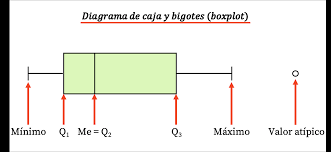


La **mediana** representa el datapoint que se encuentra a la mitad, ${Q_3}$ representa donde se encuentra el percentil 75, ${Q_1}$ representa donde se encuentra el percentil 25, los datos entre ${Q_3}$ y ${Q_1}$ representan el rango intercuartil, el máximo y mínimo se obtienen multplicando el ${Q_3}$ y ${Q_1}$ por 1.5, respectivamente, los **otliers** o **valores atípicos se representan con puntos que se encuentran fuera de los límites mínimo y máximo.

Los boxplots son útiles para comparar entre grupos

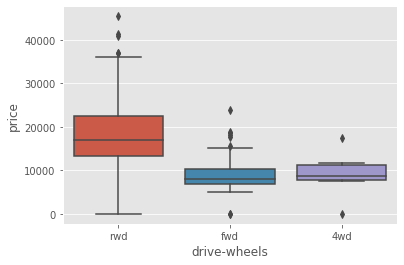

In [116]:
import seaborn as sns 
sns.boxplot(x="drive-wheels",y="price",data=df)

  En este ejemplo podemos observar las diferentes categorías de *drive-wheels* sobre el *precio*, como se puede observar full wheel-drive y 4 wheel-drive cuentan con precios casi indistinguibles.
  

## Scatterplot
* Cada observación es un punto.
* Un scatterplot muestra la relación entre dos varibles

  1. Variable predictora/independiente en el eje X.
  2. Variable objetivo/dependiente en el eje Y.

En el scatterplot por lo general la variable predictora se encuentra en el eje X y la variable objetivo en el eje Y o eje vertical. En el siguiente ejemplo graficaremos el eje X, el tamaño del motor y en el eje Y el precio.

Text(0, 0.5, 'Price')

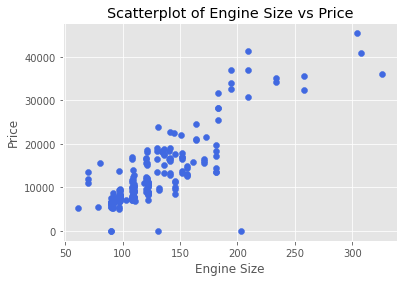

In [117]:
import matplotlib.pyplot as plt
x=df["engine-size"]
y=df["price"]
plt.scatter(x,y,color="royalblue")
plt.style.use("ggplot") #para que se vea como ggplot de R
plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

La gráfica anterior nos muestra que existe una relación lineal positiva, entre el tamaño del motor y el precio.

# GroupBy en Python
El método **groupby** es usado en variables categóricas, lo que hace es que agrupa los datos en subconjuntos de acuerdo con las diferentes categorías de las variables. 

En resumen este método hace lo siguiente:
* Puede aplicarse en variables categóricas
* Agrupar datos en categorías
* Variables únicas o múltiples

Por ejemplo si queremos saber el precio promedio de un vehículo y observar como difieren entre diferentes las variables como línea de carrocería *body-style* y tracción *drive-wheels**.

Para hacer esto seleccionamos las columnas que nos interesan y las guardamos dentro de otro **dataframe**

In [118]:
df_test=df[["drive-wheels","body-style","price"]]

Después agrupamos los datos reducidos de acuerdo con *drive-wheels* y *body-style*, dado que nos interesa conocer el precio promedio, usamos el método **mean()** de pandas.

In [119]:
df_grp=df_test.groupby(["drive-wheels","body-style"],as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,3801.500000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9467.526316
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Esta forma de visualizar datos no es la más optima, por ello podemos usar una tabla pivot para tener una variable desplegada dentro de las columnas y otras variable desplegada en las filas.

## Método de pandas - Pyvot()
- Una variable se muestra en las columnas y la otra variable se muestra en las filas. Para visualizar la tabla en formato pivot simplemente hay que usar el método *Pyvot()* dentro de la librería pandas

In [120]:
df_pivot=df_grp.pivot(index="drive-wheels",columns="body-style")

Visualizamos el resultado

In [121]:
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   3801.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9467.526316   
rwd              23949.6  24202.714286  13583.157895  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

## Gráfico de calor (Heatmap)
Otra forma de representar los datos es mediante un Heatmap
* Gráfica una variable objetivo sobre múltiples variables

Heatmap toma una cuadrícula rectangular de datos y asigna una intensidad de color basada en el
valor de los datos en los puntos de la cuadrícula, una manera de hacer el gráfico es la siguiente:


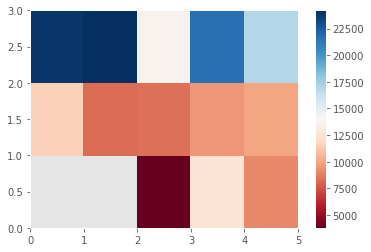

In [122]:
plt.pcolor(df_pivot,cmap="RdBu")
plt.colorbar()
plt.show()

# Análisis de Varianza (ANOVA)
* Comparación estadística de grupos
* Ejemplo: precio promedio de diferentes marcas de vehículos



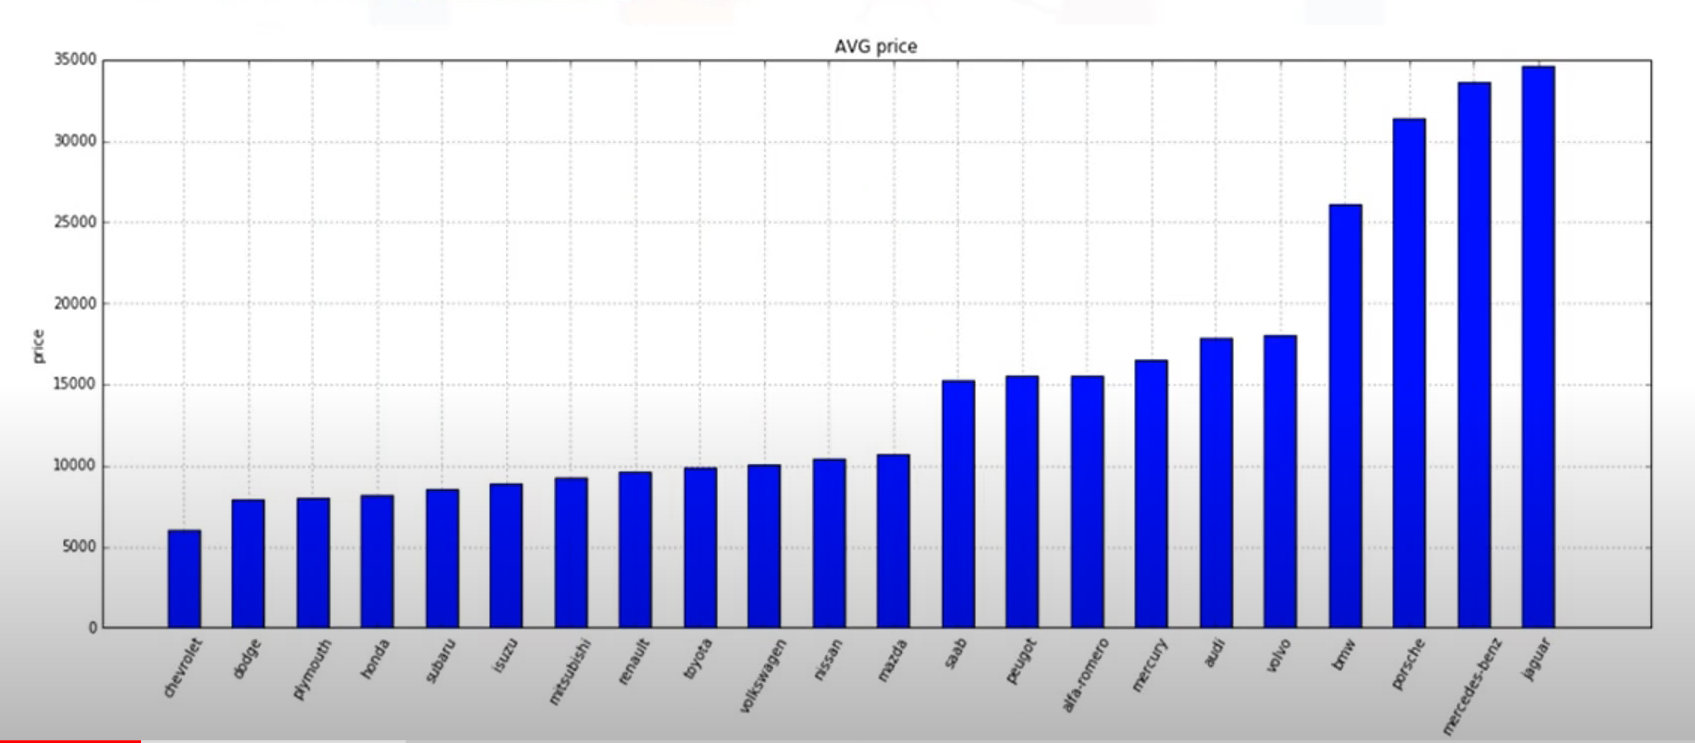

El diagrama muestra el precio promedio de diferentes marcas de vehículos